In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
X, y = datasets.make_blobs(random_state=42)

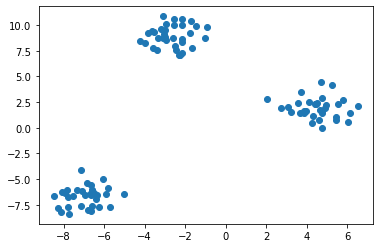

In [3]:
plt.scatter(*X.T)

## K-Means 

In [4]:
K = 3 # 1. Adım K'nın belirlenmesi

In [20]:
 # Küme merkezlerinin rastgele secilmesi
centers = np.array([[4., 6.],
                   [4., 7.],
                   [4., 8.]])   
"""merkez belirleme işlemi bu şekilde de yapılabilir"""
# centers = X[np.random.choice(range(X.shape[0], size=3)
# centers = X[[0,1,2]]

'merkez belirleme işlemi bu şekilde de yapılabilir'

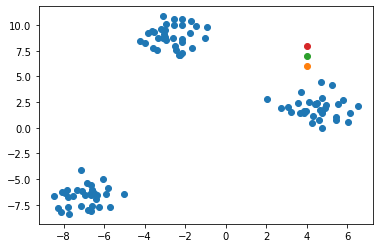

In [21]:
plt.scatter(*X.T)
for k in centers:
    plt.scatter(*k)

In [22]:
distances_squared = ((X.reshape(100,2,1)- centers.T.reshape(1,2,3))**2).sum(axis=1)

In [23]:
clusters = distances_squared.argmin(axis=1)

In [24]:
clusters

array([0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2], dtype=int64)

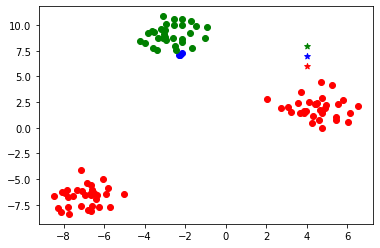

In [25]:
plt.scatter(*X[clusters==0].T, color="r")
plt.scatter(*centers[0], color="r", marker="*")
plt.scatter(*X[clusters==1].T, color="b")
plt.scatter(*centers[1], color="b", marker="*")
plt.scatter(*X[clusters==2].T, color="g")
plt.scatter(*centers[2], color="g", marker="*")


### Maliyet

In [26]:
inertia = ((X-centers[clusters])**2).sum()
inertia

11524.277138412017

In [27]:
# Küme merkezlerini kaydırma
centers[0] = X[clusters==0].mean(axis=0)
centers[1] = X[clusters==1].mean(axis=0)
centers[2] = X[clusters==2].mean(axis=0)

In [28]:
#Küme merkezleri hareket etmeyene ya da hareket miktarı tolaransın altına düşene kadar adım 3 ve 4 tekrarla
costs = []
for iter_ in range(5000):
    distances_squared = ((X.reshape(100,2,1)- centers.T.reshape(1,2,3))**2).sum(axis=1)
    clusters = distances_squared.argmin(axis=1)
 #   centers[0] = X[clusters==0].mean(axis=0)
 #   centers[1] = X[clusters==1].mean(axis=0)
  #  centers[2] = X[clusters==2].mean(axis=0)
    for i in range(K):
        centers[i]=X[clusters==i].mean(axis=0)
    inertia = ((X-centers[clusters])**2).sum()
    costs.append(inertia)

In [29]:
X[clusters==2].mean(axis=0)

array([-2.66780392,  8.93576069])

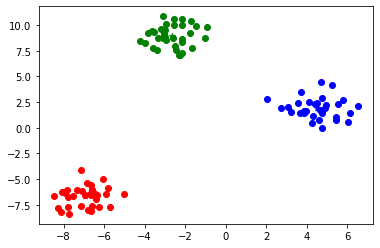

In [30]:
plt.scatter(*X[clusters==0].T, color="r")
plt.scatter(*centers[0], color="r", marker="*")
plt.scatter(*X[clusters==1].T, color="b")
plt.scatter(*centers[1], color="b", marker="*")
plt.scatter(*X[clusters==2].T, color="g")
plt.scatter(*centers[2], color="g", marker="*")

In [31]:
inertia

171.91098459057724

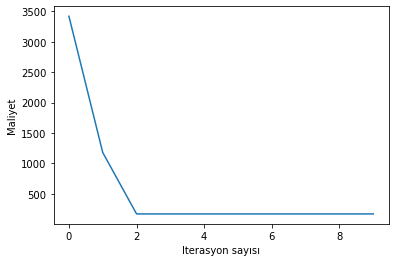

In [32]:
#iterasyona göre maliyet grafiği
plt.plot(costs[:10])
plt.xlabel("Iterasyon sayısı")
_=plt.ylabel("Maliyet")

In [33]:
centers

array([[-6.95170962, -6.67621669],
       [ 4.49951001,  1.93892013],
       [-2.66780392,  8.93576069]])

In [34]:
from PIL import Image
import wget

wget.download('https://pbs.twimg.com/profile_images/506382367326351360/BiQXU8b7_400x400.jpeg', 'orhan_baba.jpg')

img = Image.open('orhan_baba.jpg')

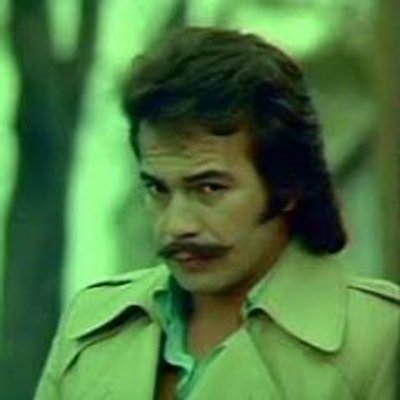

In [35]:
img

In [36]:
data = np.array(img)


In [37]:
data.reshape(-1,3)

array([[110, 184, 105],
       [111, 185, 106],
       [111, 184, 105],
       ...,
       [ 30,  61,  17],
       [ 25,  56,  12],
       [ 23,  54,  10]], dtype=uint8)

In [39]:
from sklearn.cluster import KMeans

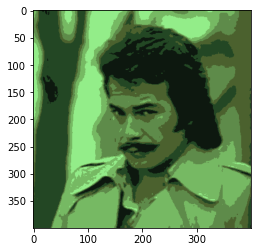

In [40]:
data_flat = data.reshape(-1, data.shape[-1])
compressor = KMeans(n_clusters=6, n_jobs=-1, max_iter=5, n_init=1)
compressor.fit(data_flat)
clusters = compressor.predict(data_flat)
reconstructed_flat = compressor.cluster_centers_[clusters]
reconstructed = reconstructed_flat.reshape(*data.shape) / 255.
plt.imshow(reconstructed)




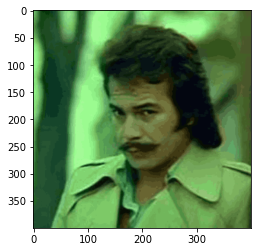

In [41]:
data_flat = data.reshape(-1, data.shape[-1])
compressor = KMeans(n_clusters=64, n_jobs=-1, max_iter=5, n_init=1)
compressor.fit(data_flat)
clusters = compressor.predict(data_flat)
reconstructed_flat = compressor.cluster_centers_[clusters]
reconstructed = reconstructed_flat.reshape(*data.shape) / 255.
plt.imshow(reconstructed)

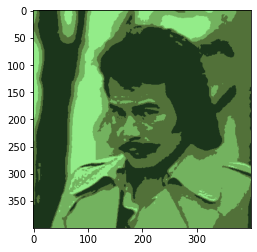

In [43]:
data_flat = data.reshape(-1, data.shape[-1])
compressor = KMeans(n_clusters=4, n_jobs=-1, max_iter=5, n_init=1)
compressor.fit(data_flat)
clusters = compressor.predict(data_flat)
reconstructed_flat = compressor.cluster_centers_[clusters]
reconstructed = reconstructed_flat.reshape(*data.shape) / 255.
plt.imshow(reconstructed)